# arpandey14@earlham.edu Xtern Data Science Technical Screen

A dataset (checkin_dataset) of user GPS information was given, and the task was to draw conclusions from the dataset that would facilitate the development of the Community Highlights feature of OSXtern. The community highlights feature shows a user highlighted opportunities and locations around the city that can help guide their weekend or dinner plans. For this analysis, I've found the top areas 50 that users were visiting during dinnertime (6PM to 10PM) on the weekdays, and the top 50 areas that users were visiting from noon until midnight on the weekends. 

These top visited areas can be used in the development of the community highlights feature by narrowing the highlights to the bars/restaurants/events in the areas identified. 

Workflow for my analysis:

1. Convert 'checkin_dataset.csv' to 'First_Converted_Dataset.xlsx' for compatibility with openpyxl. 
2. Extract user data from the weekends (Friday, Saturday, and Sunday), and the user data from weekdays (Monday-Thursday). 
3. On weekends, extract data from noon to midnight, and on weekdays, extract data from 6PM to 10PM to generate one xlsx file with data on weekends from noon to midnight, and another with data on weekdays from 6PM to 10PM. 
4. Identify the top 50 areas (I've used 2 decimal places of coordinate precision, however this can be changed to the degree of precision desired). 
5. Result visualization through pandas histogram. 

In [1]:
''' This script extracts the data on Friday, Saturday and Sunday for the First_Converted_Dataset.
'''
#Lodaing the relevant libraries.
from openpyxl import load_workbook, Workbook
wb = load_workbook('First_Converted_Dataset.xlsx') #Name of workbook you want to import.
ws = wb.active
wb1 = Workbook()
ws1 = wb1.create_sheet()
myList = []

#Traverse through the rows of the excel sheet.
for i in range (1, 25670): #for i in range (1, NUMBER OF ROWS IN SHEET + 1)
    d1 = ws.cell(row = i, column = 7) #column = Column # with the submission date.
    if d1.value == "Friday" or d1.value == "Satruday" or d1.value == "Sunday": #Checking if the days are F, Sat, or Sun.
        for p in range (1, 10):
            store_val = ws.cell(row = i, column = p)
            myList.append (store_val.value)
        ws1.append(myList) #Writing the relevant rows to the new worksheet.
    myList = []
wb1.save('WeekendFilter.xlsx')

In [2]:
''' This script extracts the data on weekdays from the First_Converted_Dataset.
'''

#Lodaing the libraries.
from openpyxl import load_workbook, Workbook
wb = load_workbook('First_Converted_Dataset.xlsx') 
ws = wb.active
wb1 = Workbook()
ws1 = wb1.create_sheet()
myList = []

#Traverse through the rows of the excel sheet.
for i in range (1, 25670): #for i in range (1, NUMBER OF ROWS IN SHEET + 1)
    d1 = ws.cell(row = i, column = 7) 
    if d1.value != "Friday" and d1.value != "Saturday" and d1.value != "Sunday": #Checking for weekdays. 
        for p in range (1, 10):
            store_val = ws.cell(row = i, column = p)
            myList.append (store_val.value)
        ws1.append(myList) #Writing the relevant rows to a new excel sheet. 
    myList = []
wb1.save('WeekdayFilter.xlsx')


In [3]:
''' This script filters through the weekday data to find location data between 6PM and 10PM (usual weekday dinner time) only.
'''

#Load libraries
from openpyxl import load_workbook, Workbook
wb = load_workbook('WeekdayFilter.xlsx')
ws = wb["Sheet1"]
wb1 = Workbook()
ws1 = wb1.create_sheet()
myList = []
#Traverse through the rows of the excel sheet.
for i in range (2, 14696): #for i in range (2, NUMBER OF ROWS IN SHEET + 1)
    d1 = ws.cell(row = i, column = 8)
    if d1.value <= 22 and d1.value >=18: #Checking for relevant timestamps.
        for p in range (1, 10):
            store_val = ws.cell(row = i, column = p)
            myList.append (store_val.value)
        ws1.append(myList) #Writing the relevant data to new excel sheet.
    myList = []
wb1.save('Weekdays_6PM_10PM.xlsx')

In [4]:
''' This script filters through the weekend data to find relevant timestamp data (Noon-Midnight).
'''
#Load libraries
from openpyxl import load_workbook, Workbook
wb = load_workbook('WeekendFilter.xlsx') #Name of workbook you want to import.
ws = wb["Sheet1"]
wb1 = Workbook()
ws1 = wb1.create_sheet()
myList = []
#Traverse through the rows of the excel sheet.
for i in range (2, 7048): #for i in range (2, NUMBER OF ROWS IN  SHEET + 1)
    d1 = ws.cell(row = i, column = 8)
    if d1.value <= 24 and d1.value >=12:
        for p in range (1, 10):
            store_val = ws.cell(row = i, column = p)
            myList.append (store_val.value) #append relevant data to new excel sheet.
        ws1.append(myList)
    myList = []
wb1.save('Weekends_NOON_MIDNIGHT.xlsx')

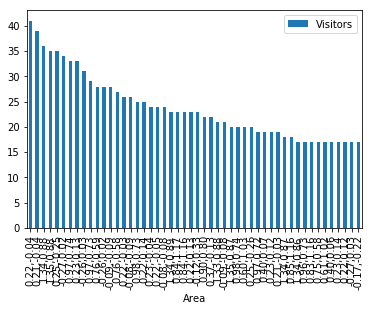

In [7]:
''' This is the script used to convert the Weekend data into a frequency histogram
'''

#Load the relevant libraries.
from openpyxl import load_workbook, Workbook
from collections import Counter
from collections import OrderedDict
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt

wb = load_workbook('Weekends_NOON_MIDNIGHT.xlsx') #Name of workbook being imported.
ws = wb["Sheet1"]
myList = []

#Traverse through the rows of the excel sheet.
for i in range (1, 3090): #for i in range (1, NUMBER OF ROWS IN SHEET + 1)
    x1 = ws.cell(row = i, column = 4) 
    y1 = ws.cell(row=i, column = 5)
    tup = (format(x1.value, '.2f'), format(y1.value, '.2f'))
    myList.append(tup)

d = {x:myList.count(x) for x in myList} #Creating a dictionary with cooridnates as the key, and frequency of the coordinate as the value.
sorted_d = OrderedDict(sorted(d.items(),key=itemgetter(1,0),reverse = True)) #Ordering the dictionary. 
counter = 0
s = ""
glist = []

for k,l in sorted_d.items(): # Creating a list of most visited areas in the form [(cooridnate, frequency)].
    s = str(k[0]) + "," + str(k[1])
    glist.append((s,l))
    counter += 1
    if counter == 50:
        break

df = pd.DataFrame(glist, columns=['Area', 'Visitors']) # Grpahing the results on a basic histogram for data visualization.
df.plot(kind='bar', x='Area')
plt.show()

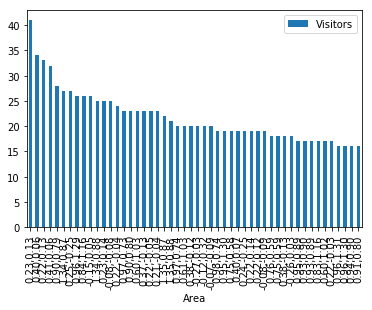

In [6]:
''' This is the script used to convert the Weekend data into a frequency histogram
'''

#Load the relevant libraries.
from openpyxl import load_workbook, Workbook
from collections import Counter
from collections import OrderedDict
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt

wb = load_workbook('Weekdays_6PM_10PM.xlsx') #Name of workbook being imported.
ws = wb["Sheet1"]
myList = []

#Traverse through the rows of the excel sheet.
for i in range (1, 3065): #for i in range (1, NUMBER OF ROWS IN SHEET + 1)
    x1 = ws.cell(row = i, column = 4) 
    y1 = ws.cell(row=i, column = 5)
    tup = (format(x1.value, '.2f'), format(y1.value, '.2f'))
    myList.append(tup)

d = {x:myList.count(x) for x in myList} #Creating a dictionary with cooridnates as the key, and frequency of the coordinate as the value.
sorted_d = OrderedDict(sorted(d.items(),key=itemgetter(1,0),reverse = True)) #Ordering the dictionary. 
counter = 0
s = ""
glist = []

for k,l in sorted_d.items(): # Creating a list of most visited areas in the form [(cooridnate, frequency)].
    s = str(k[0]) + "," + str(k[1])
    glist.append((s,l))
    counter += 1
    if counter == 50:
        break

df = pd.DataFrame(glist, columns=['Area', 'Visitors']) # Grpahing the results on a basic histogram for data visualization.
df.plot(kind='bar', x='Area')
plt.show()